In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# to hide warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

pd.pandas.set_option("display.max_columns",None)

In [4]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Analysis

In [5]:
df.shape

(545, 13)

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
num_feat=[i for i in df if df[i].dtype!="O"]
num_feat

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [10]:
cat_feat=[i for i in df.columns if i not in num_feat]
cat_feat

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [11]:
dis_feat=[i for i in num_feat if len(df[i].unique())<20]
df[dis_feat].head()

,bedrooms,bathrooms,stories,parking
0,4,2,3,2
1,4,4,4,3
2,3,2,2,2
3,4,2,2,3
4,4,1,2,2


# Here price is the Response variable so we separate it from the vars

In [12]:
# Separate discrete and contnnous data
cont_feat=[i for i in num_feat if i not in dis_feat and i !="price"]
df[cont_feat].head()

,area
0,7420
1,8960
2,9960
3,7500
4,7420


# Visualize the data

### use mean as there is no outliers in discrete variable

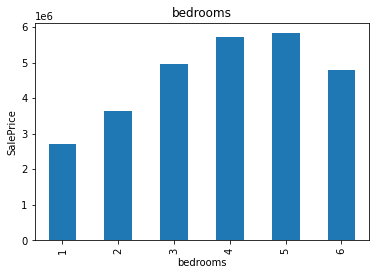

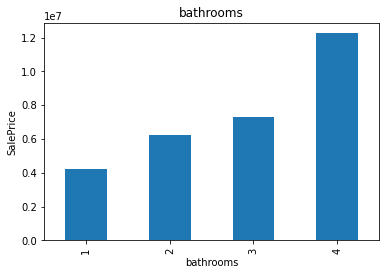

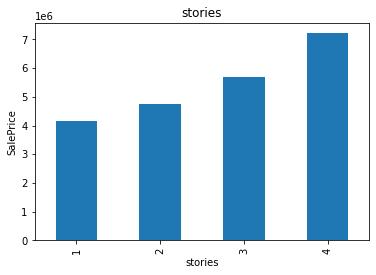

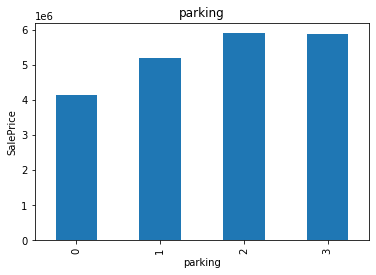

In [13]:
for i in dis_feat:
    df1=df.copy()
    df1.groupby(i)["price"].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

# Observauons
* Price start decreseing after bedroom size 5
* price increase as Bathroom and stories increases
* After parking size 2 there is no much significance on price

### Check if the discerte variables are linearly realted to price or not via scatter plot

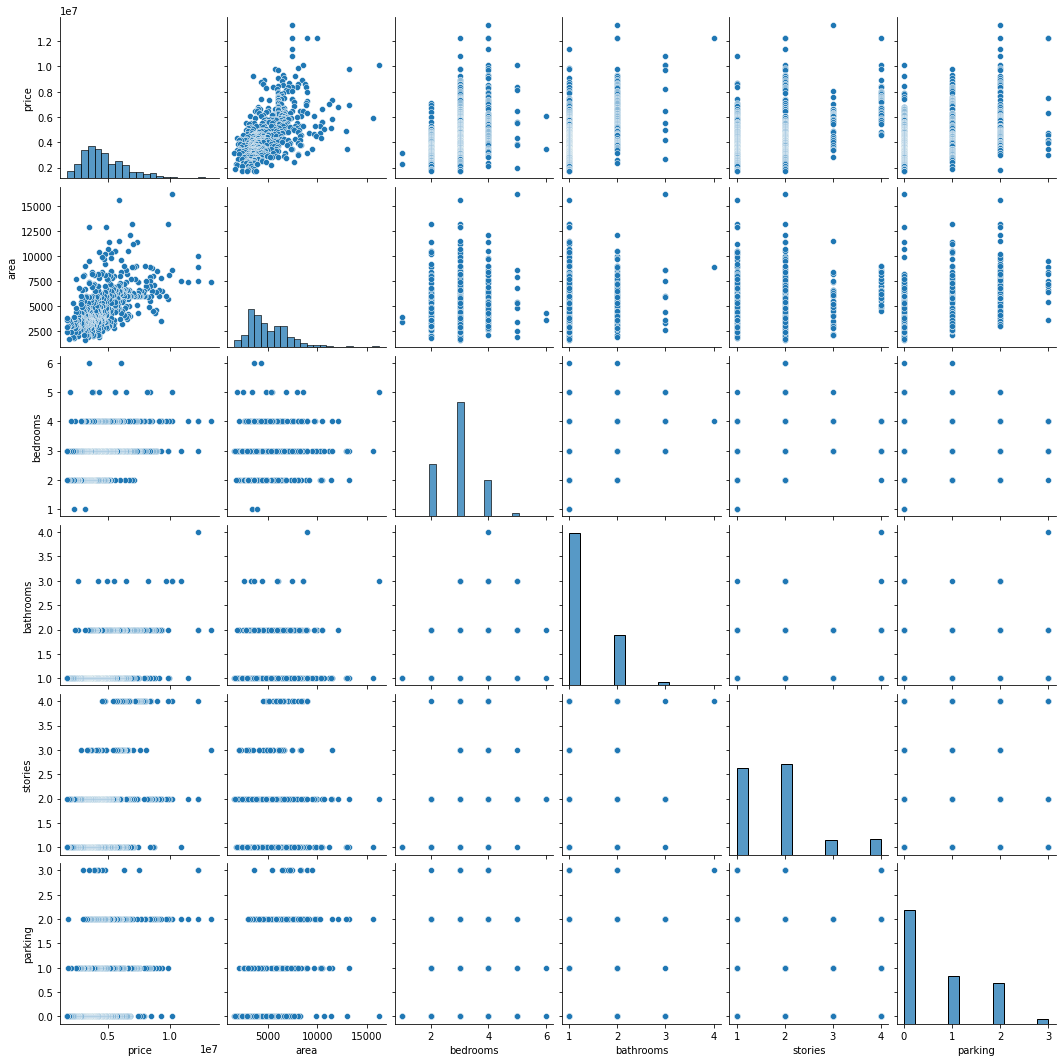

In [14]:
sns.pairplot(df)
plt.show()

### Observtaions
    * Here Area is positively corealted with price, means its most of the variance is explianed by area but not all otherwise we got a neat strainght scatter plot

# Visualize Continous variable

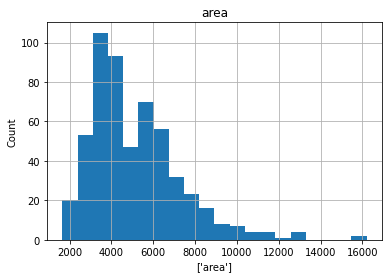

In [15]:
df1[cont_feat].hist(bins=20)
plt.xlabel(cont_feat)
plt.ylabel("Count")
plt.show()

<AxesSubplot:xlabel='area', ylabel='Count'>

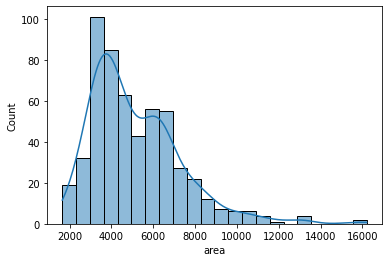

In [16]:
sns.histplot(x="area",data=df,kde=True)

## Lets check content of categorial variables

In [17]:
df[i].unique()

array([2, 3, 0, 1], dtype=int64)

In [18]:
val=[]
for i in cat_feat:
    val=df[i].unique()
    print("{}, values are:- {} ".format(i,val))

mainroad, values are:- ['yes' 'no'] 
guestroom, values are:- ['no' 'yes'] 
basement, values are:- ['no' 'yes'] 
hotwaterheating, values are:- ['no' 'yes'] 
airconditioning, values are:- ['yes' 'no'] 
prefarea, values are:- ['yes' 'no'] 
furnishingstatus, values are:- ['furnished' 'semi-furnished' 'unfurnished'] 


## lets plot box plot for categorial variables

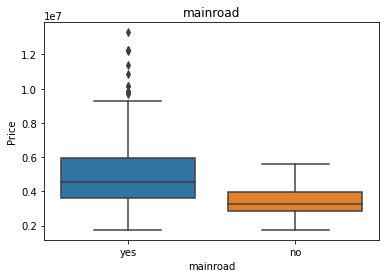

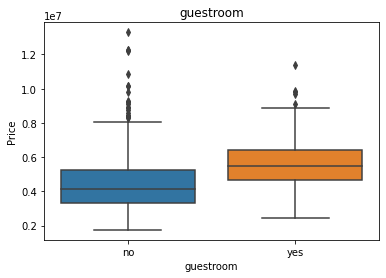

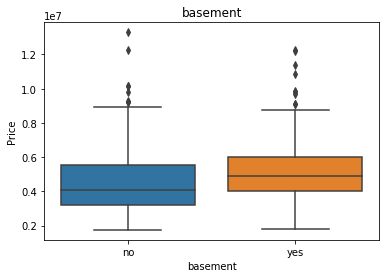

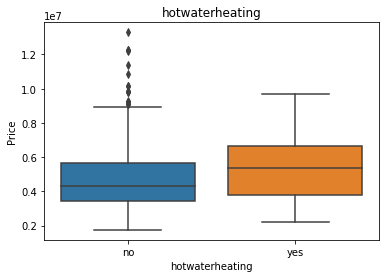

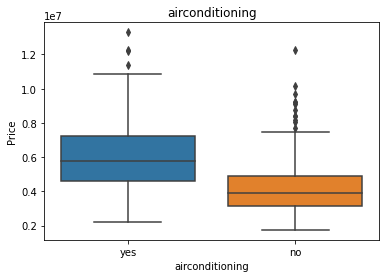

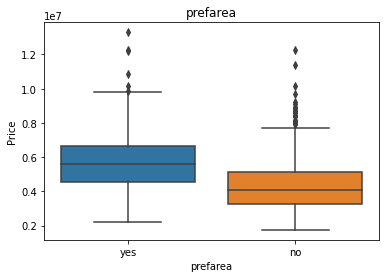

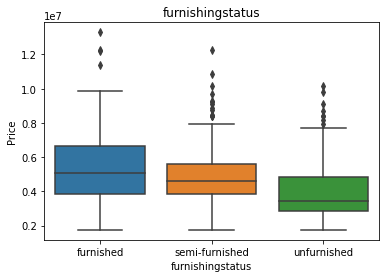

In [19]:

for i in cat_feat:
    sns.boxplot(x=i,y="price",data=df)
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)
    plt.show()


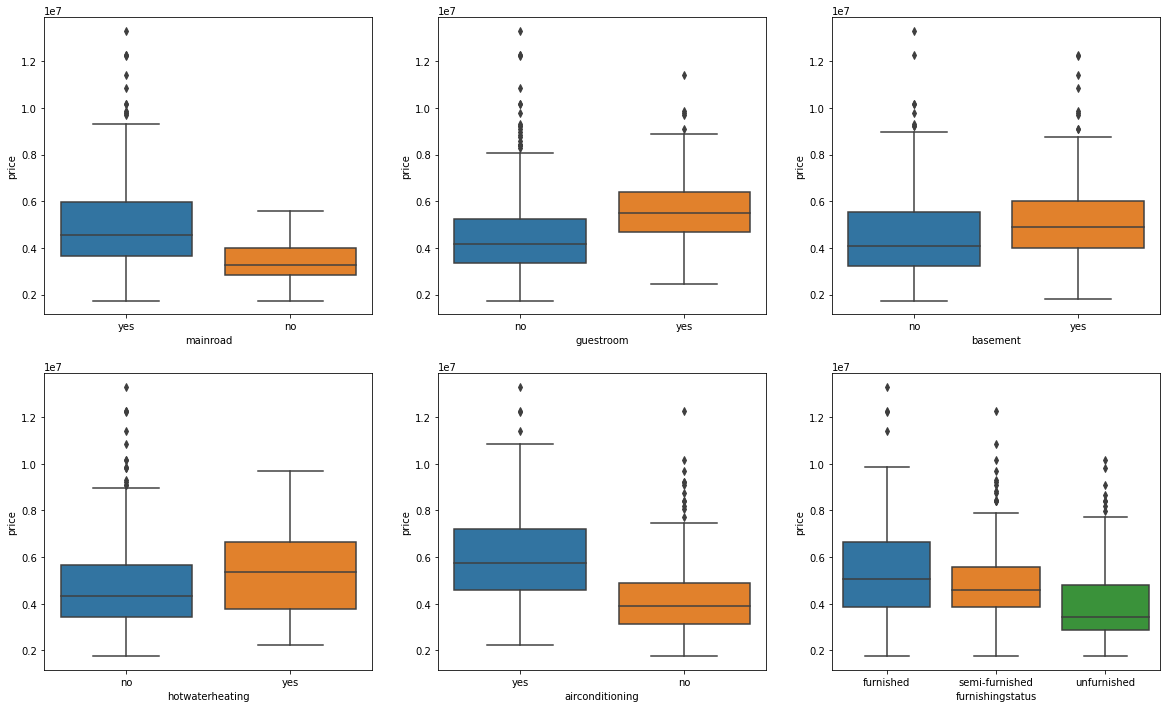

In [20]:
# Alternatively we can also do
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

In [21]:
cat_feat

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

# Observation
##### * if 'mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea' has value YES then proce are high if "furnishingstatus" is Furnished then price is high
* Alse there are lots of outliers

### -------------------------------------------------------For Practise----------------------------------------------------------------------

In [22]:
l1=['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']
l2=['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']

In [23]:
df1=pd.DataFrame({"Name":l1,"Response":l2})
df1

,Name,Response
0,Reetesh,No
1,Shruti,Maybe
2,Kaustubh,yes
3,Vikas,Yes
4,Mahima,maybe
5,Akshay,Yes


In [24]:
df1["Response"].str.lower()

0       no
1    maybe
2      yes
3      yes
4    maybe
5      yes
Name: Response, dtype: object

In [25]:
dict1={"no":0,"yes":1,"maybe":0.5}
dict1
df1["Response1"]=(df1["Response"].str.lower()).map(dict1)
df1

,Name,Response,Response1
0,Reetesh,No,0.0
1,Shruti,Maybe,0.5
2,Kaustubh,yes,1.0
3,Vikas,Yes,1.0
4,Mahima,maybe,0.5
5,Akshay,Yes,1.0


### ----------------------------------------------------------------- Practise Ends----------------------------------------------------------------------

# Step 2- Data Prepartion for Data Modelling
* You can see that your dataset has many columns with values as 'Yes' or 'No'.
* But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [26]:
for i in cat_feat:
    val=df[i].unique()
    print("{}, values are:- {} ".format(i,val))

mainroad, values are:- ['yes' 'no'] 
guestroom, values are:- ['no' 'yes'] 
basement, values are:- ['no' 'yes'] 
hotwaterheating, values are:- ['no' 'yes'] 
airconditioning, values are:- ['yes' 'no'] 
prefarea, values are:- ['yes' 'no'] 
furnishingstatus, values are:- ['furnished' 'semi-furnished' 'unfurnished'] 


In [27]:
binary_feat=[i for i in cat_feat if i not in "furnishingstatus" ]
df[binary_feat].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [28]:
# HEre we map yes to 1 and no to 0
dt1={"yes":1,"no":0}
df_nw=df.copy()
for i in binary_feat:
    df_nw[i]=df_nw[i].map(dt1)
df_nw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [29]:
# Alternatively we can do
#df2=df.copy()
#df2[binary_feat]=df2[binary_feat].apply(lambda x:x.map({"yes":1,"no":0}))

 # Dummy variables

#### For "furnishingstatus" we create dummy variables

In [30]:
#status=pd.get_dummies(df["furnishingstatus"])
#status.head()

In [31]:
 # Here we drop one variable as 2 variable also coney the same thing we have studied that
status=pd.get_dummies(df_nw["furnishingstatus"],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [32]:
# Now concat status to the dataframe
df_nw=pd.concat([df_nw,status],axis=1)
df_nw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [33]:
# dropping "furnishingstatus"
df_nw.drop("furnishingstatus",axis=1,inplace=True)

In [34]:
df_nw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Splitting data into train test

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [35]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_nw, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [36]:
num_feat

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables 
# i.e for ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
scaler = MinMaxScaler()

In [38]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
# fit(): learn xmin,xmax
# transform(): x-xmin/xmax-xmin
# fit_transform(): both of the above techinques are applied

In [40]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


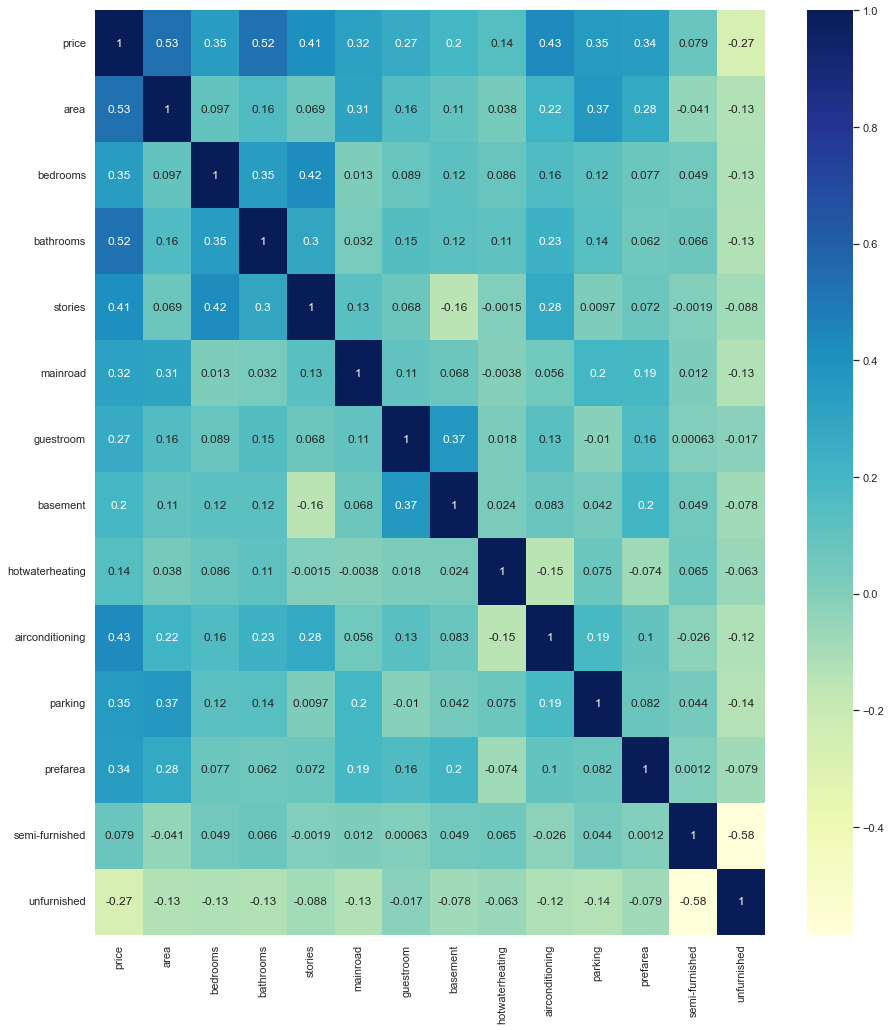

In [41]:
# Check for corelation
sns.set(rc={"figure.figsize":(15,17)})
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [42]:
df_train.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.532025,0.349825,0.524246,0.409464,0.319208,0.265877,0.200743,0.141202,0.433162,0.352081,0.344543,0.078917,-0.270114
area,0.532025,1.000000,0.097462,0.163446,0.069274,0.308272,0.155665,0.106971,0.037719,0.215888,0.365658,0.279878,-0.040753,-0.131524
bedrooms,0.349825,0.097462,1.000000,0.346925,0.419582,0.012655,0.089488,0.120618,0.085818,0.161890,0.120363,0.076503,0.049111,-0.125921
bathrooms,0.524246,0.163446,0.346925,1.000000,0.295689,0.031716,0.150982,0.120857,0.112732,0.228315,0.138241,0.061584,0.065987,-0.128192
stories,0.409464,0.069274,0.419582,0.295689,1.000000,0.129427,0.068088,-0.155313,-0.001538,0.279779,0.009708,0.072192,-0.001883,-0.088199
mainroad,0.319208,0.308272,0.012655,0.031716,0.129427,1.000000,0.106875,0.067937,-0.003779,0.056375,0.200389,0.191465,0.012254,-0.129101
guestroom,0.265877,0.155665,0.089488,0.150982,0.068088,0.106875,1.000000,0.367345,0.018394,0.130300,-0.010240,0.161877,0.000632,-0.017198
basement,0.200743,0.106971,0.120618,0.120857,-0.155313,0.067937,0.367345,1.000000,0.023806,0.082892,0.042203,0.203933,0.049430,-0.077562
hotwaterheating,0.141202,0.037719,0.085818,0.112732,-0.001538,-0.003779,0.018394,0.023806,1.000000,-0.153801,0.074999,-0.074318,0.064641,-0.063025
airconditioning,0.433162,0.215888,0.161890,0.228315,0.279779,0.056375,0.130300,0.082892,-0.153801,1.000000,0.188132,0.099840,-0.026475,-0.123584


In [43]:
# Alternative way
# let create a function checking corealtion using threshold
def corr_chck(dataset,threshold):
    col_corr=set()
    data=df_train.copy()
    val=dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(val.iloc[i,j])>threshold:
                col_name=dataset.columns[i]
                col_corr.add(col_name)          
    return col_corr

### -------------------------------------------------For Info----------------------------------------- --------------------------------------------------------

In [44]:
# Thats how the code above works it never encountere 1:1 in any case
for i in range(5):
    for j in range(i):
        print(i,j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3


In [45]:
df_train.columns[1]

'area'

## -------------------------------------------------------END ----------------------------------------------------------

## Lets check if there are corealtion is greater than 0.8

In [46]:
corr_chck(df_train,0.8)

set()

In [47]:
# Check with 0.6
corr_chck(df_train,0.5)

{'area', 'bathrooms', 'unfurnished'}

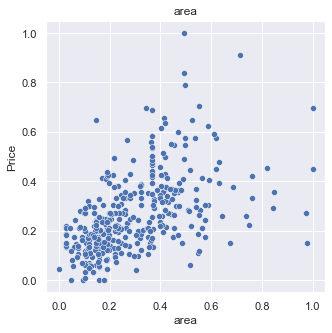

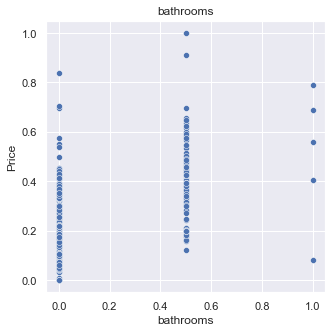

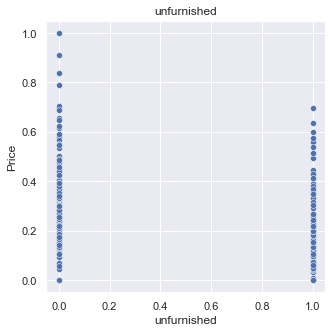

In [48]:
 #lets cehck {'area', 'bathrooms', 'unfurnished'} realation with price
var_chck=['area', 'bathrooms', 'unfurnished']
sns.set({"figure.figsize":(5,5)})
for i in var_chck:
    sns.scatterplot(data=df_train,x=i,y="price")
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)
    plt.show()

# Observation
1. Area have postive corealtion with price

# Approach 1 of Model buildind

In [49]:
# Lets separate X_train and y_train
y_train=df_train.pop("price")
X_train=df_train

In [50]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [51]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

# Lets try VIF by adding one by one variable

In [52]:
# lets do it for AREA
X_train_sm=sm.add_constant(X_train["area"])

In [53]:
# Create first model
lr_area=sm.OLS(y_train,X_train_sm).fit()
lr_area.params

const    0.126894
area     0.462192
dtype: float64

In [54]:
lr_area.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           3.15e-29
Time:                        16:49:35   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## since r2 and adjusted r2 are so small we add another variable


In [55]:
# Add another variable bathroom
X_train_sm=X_train[["area","bathrooms"]]
X_train_sm=sm.add_constant(X_train_sm)
# Create model
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [56]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           2.51e-54
Time:                        16:49:36   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Add another variable airconditioning
X_train_sm=X_train[["area","bathrooms","airconditioning"]]
X_train_sm=sm.add_constant(X_train_sm)
# Build model
lr1=sm.OLS(y_train,X_train_sm).fit()
lr1.params

const              0.094756
area               0.358061
bathrooms          0.265044
airconditioning    0.086986
dtype: float64

In [58]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           6.61e-63
Time:                        16:49:36   Log-Likelihood:                 310.99
No. Observations:                 381   AIC:                            -614.0
Df Residuals:                     377   BIC:                            -598.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0948      0.011      8.932      0.000       0.074       0.116
area                0.3581      0.031     11.414      0.000       0.296       0.420
bathrooms           0.2650      0.024     11.021      0.000       0.218       0.312
airconditioning     0.0870      0.013      6.916      0.000       0.062       0.112
==============================================================================
Omnibus:                       67.166   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.372
Skew:                           0.863   Prob(JB):                     4.52e-37
Kurtosis:                       5.750   Cond. No.                         6.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Advantages
1. You can see the change in r2 and adj r2 one by one by adding the variable and drop that variable if there is no significance
#### Disadvantages
1. If you have a lot of vriables this is a quite tedious job to create the model

# Approach- 2 Adding all the variables at once

In [59]:
X_train_sm=sm.add_constant(X_train)
lr2=sm.OLS(y_train,X_train_sm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           8.83e-83
Time:                        16:49:36   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Now we drop variables based on-
1. VIF
2. Significance value i.e p value .05 i.e we consider 95% confidence interval

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# create VIF to check the values 
vif=pd.DataFrame()
vif["feature"]=[i for i in X_train]
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values("VIF",ascending=False)

In [62]:
# Lets create a function for vif as we have to chack it again and agai
def vif_chck(X_train):
    vif=pd.DataFrame()
    vif["Feature"]=[i for i in X_train]
    vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values("VIF",ascending=False)
    return vif

In [63]:
vif_chck(X_train)

,Feature,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [64]:
len(X_train.columns)

13

### Usually we take Situations like
#### 1. High p-value , High VIF-- Remove them as it is an easy case
#### 2. High - Low  
a. High p-value, low VIF --- Remove them having high p valuse as VIf descrese when we rebuild th model

b. Low p, High VIF---- Remove these after the first above
#### 3. Low p-value , Low VIF

In [65]:
# Here semi-furnished  have high p value is 0.9 we remove it first
X=X_train.drop("semi-furnished",axis=1)

In [66]:
# Create another model
X_train_sm=sm.add_constant(X)
lr2=sm.OLS(y_train,X_train_sm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.07e-83
Time:                        16:49:37   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Check VIF
vif_chck(X)

,Feature,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [68]:
# check again now we see bedroom s have high VIF and high p value
X=X_train.drop(["bedrooms","semi-furnished"],axis=1)
# Create another model
X_train_sm=sm.add_constant(X)
lr2=sm.OLS(y_train,X_train_sm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           2.73e-84
Time:                        16:49:38   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Check VIF
vif_chck(X)

,Feature,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


# This is the final model havingg low VIF and P- Value

# Residual analyisis of train data

In [70]:
y_train_price = lr2.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

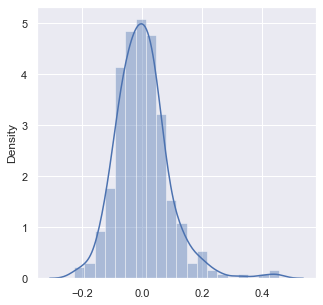

In [71]:
sns.distplot((y_train - y_train_price), bins = 20)

#### ERROR terms are normally distributed so our odel "lr2" is correct

# To check if the residual is normal distributed or not we use Q-Q plot

In [72]:
import scipy.stats as stat
import pylab

In [73]:
res=y_train - y_train_price

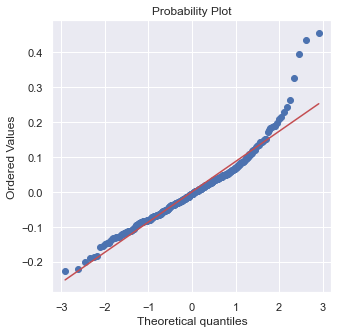

In [74]:
stat.probplot(res,dist="norm",plot=pylab)
plt.show()

# Step-4 Predictions and evaluation of test set

In [75]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [76]:
#### Applying the scaling on the test sets\
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [77]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test=df_test.pop("price")
X_test=df_test

In [79]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [80]:
y_test

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
         ...   
413    0.145455
191    0.284848
310    0.206061
46     0.500000
50     0.490909
Name: price, Length: 164, dtype: float64

In [81]:
# Add constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [82]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
# coz these vriable we removed whi;etraining the data

X_test_sm = X_test_sm.drop(["bedrooms", "semi-furnished"], axis = 1)
X_test_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0


# Predcict

In [83]:
y_test_pred=lr2.predict(X_test_sm)

# Evaluate the model

In [84]:
from sklearn.metrics import r2_score


In [85]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789

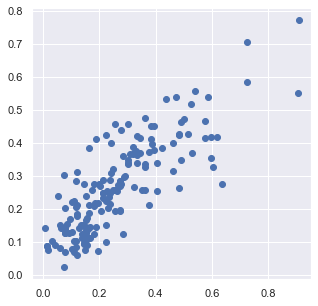

In [86]:
plt.scatter(y_test,y_test_pred)

We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $

# Sampling techniuque Using RFE(Recursive Feature Elimination)

In [87]:
df=pd.read_csv("Housing.csv")
num_feat=[i for i in df if df[i].dtype!="O"]
cat_feat=[i for i in df.columns if i not in num_feat]
dis_feat=[i for i in num_feat if len(df[i].unique())<20]
cont_feat=[i for i in num_feat if i not in dis_feat and i !="price"]
binary_feat=[i for i in cat_feat if i not in "furnishingstatus" ]
dt1={"yes":1,"no":0}
df1=df.copy()
for i in binary_feat:
    df1[i]=df1[i].map(dt1)
status=pd.get_dummies(df1["furnishingstatus"],drop_first=True)
df1=pd.concat([df1,status],axis=1)
df1.drop("furnishingstatus",axis=1,inplace=True)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [88]:
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [89]:
y_train=df_train.pop("price")
X_train=df_train

# RFE

In [90]:
# import RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [91]:
# Running RFE with the output number of variable equal to 10
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [93]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False])

In [94]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 2])

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

### rfe.ranking_ gives ranking of the best variables like 1 for best ,2 for next best and so on 

In [96]:
# selecting colums which was advised by rfe
cols=X_train.columns[rfe.support_]
cols

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [97]:
#Dropped columns
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

# Building stats model for detailed stats

In [98]:
X_train_rfe=X_train[cols]
# Adding constant
X_train_sm=sm.add_constant(X_train_rfe)

In [99]:
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0


In [100]:
lm_model=sm.OLS(y_train,X_train_sm).fit()
lm_model.params

const              0.002721
area               0.236257
bedrooms           0.066102
bathrooms          0.198169
stories            0.097722
mainroad           0.055649
guestroom          0.038136
hotwaterheating    0.089673
airconditioning    0.071079
parking            0.063739
prefarea           0.064326
dtype: float64

In [101]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.28e-82
Time:                        16:49:45   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif_chck(X_train_sm)

,Feature,VIF
0,const,14.67
1,area,1.36
4,stories,1.36
2,bedrooms,1.33
3,bathrooms,1.25
8,airconditioning,1.23
9,parking,1.23
5,mainroad,1.17
10,prefarea,1.13
6,guestroom,1.08


In [103]:
# Rebuild the model after removing bedrooms as it has high p Value
X_train_sm.drop("bedrooms",axis=1,inplace=True)

In [104]:
lm_model=sm.OLS(y_train,X_train_sm).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           6.67e-83
Time:                        16:49:45   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
vif_chck(X_train_sm)

,Feature,VIF
0,const,8.18
1,area,1.36
7,airconditioning,1.23
8,parking,1.22
2,bathrooms,1.19
3,stories,1.19
4,mainroad,1.16
9,prefarea,1.13
5,guestroom,1.08
6,hotwaterheating,1.07


# Residula analysis of train _data

In [106]:
y_train_pred=lm_model.predict(X_train_sm)

In [107]:
res=y_train-y_train_pred

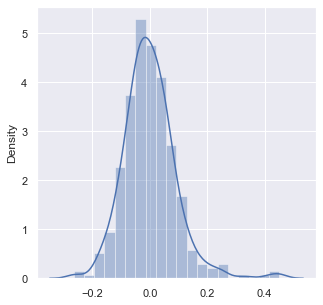

In [108]:
sns.distplot(res,hist=True,bins=20)
plt.show()

# Making Predictions on test set

In [109]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [110]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
# divide data into x_test and y_test
y_test=df_test.pop("price")
X_test=df_test

In [112]:
X_train_sm.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [113]:
test_col=[i for i in X_train_sm.columns if i!="const" ]

In [114]:
# selecting columns which was in X_train_sm except const
X_test=X_test[test_col]
X_test.head(3)

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
265,0.091869,0.0,0.333333,1,0,0,0,0.000000,1
54,0.366420,0.5,0.333333,1,1,0,1,0.333333,0
171,0.742080,0.0,0.000000,1,0,0,0,0.333333,1


In [115]:
# Add constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0.000000,1
54,1.0,0.366420,0.5,0.333333,1,1,0,1,0.333333,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0.333333,1
244,1.0,0.306582,0.0,0.333333,1,1,0,0,0.000000,1
268,1.0,0.274023,0.0,0.333333,1,0,0,1,0.000000,0


# Make predictions

In [116]:
y_test_pred=lm_model.predict(X_test_sm)

# Model Evaluation

In [117]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6481740917926484

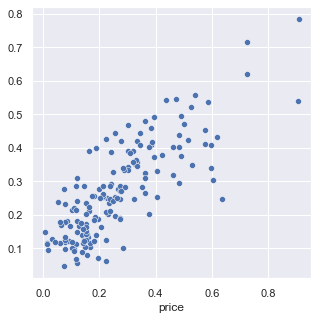

In [118]:
# Plotting this
res=y_test-y_test_pred
sns.scatterplot(y_test,y_test_pred)
plt.show()